In [ ]:
import pandas as pd
df = pd.read_csv("/content/balanced_data.csv")
df.shape

(12411, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Avg min between sent tnx                 12411 non-null  float64
 1   Avg min between received tnx             12411 non-null  float64
 2   Time Diff between first and last (Mins)  12411 non-null  float64
 3   Sent tnx                                 12411 non-null  int64  
 4   Received Tnx                             12411 non-null  int64  
 5   Number of Created Contracts              12411 non-null  int64  
 6   max value received                       12411 non-null  float64
 7   avg val received                         12411 non-null  float64
 8   avg val sent                             12411 non-null  float64
 9   total Ether sent                         12411 non-null  float64
 10  total ether balance                      12411

In [ ]:
# Load your data
X = df.drop("FLAG", axis=1)
y = df["FLAG"]

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The below code evaluates the performance and resource utilization of a Random Forest Classifier during training and testing. It tracks training time, memory usage, and CPU usage using the psutil library. The classifier is configured with specific hyperparameters like max_depth, max_features, min_samples_leaf, min_samples_split, and n_estimators. Before and after training, the memory usage and CPU activity are measured to compute the resources consumed. The training time is calculated by subtracting the start time from the end time. During testing, the model predicts on the test dataset (X_test), and the testing time is similarly recorded. Finally, the accuracy of the model is calculated using the accuracy_score function. Resource usage metrics, training/testing times, and accuracy are printed, providing a comprehensive understanding of the model's computational and predictive performance.

In [ ]:
import time
import psutil
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to monitor resource usage
def get_resource_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    cpu_percent = process.cpu_percent(interval=0.1)
    return memory_info.rss / (1024 * 1024), cpu_percent  # Return memory in MB and CPU percentage

# Track training time and resource allocation
start_time = time.time()
start_memory, start_cpu = get_resource_usage()

# Training the model
model = RandomForestClassifier(
    max_depth=10,
    max_features=0.3139538085100205,
    min_samples_leaf=int(1.7307339350609041),  # Ensure integer value
    min_samples_split=int(14.052804288439336),  # Ensure integer value
    n_estimators=123
)
model.fit(X_train, y_train)

end_memory, end_cpu = get_resource_usage()
end_time = time.time()

training_time = end_time - start_time
memory_used = end_memory - start_memory

print(f"Training Time: {training_time:.2f} seconds")
print(f"Memory Used during Training: {memory_used:.2f} MB")
print(f"CPU Usage during Training: {start_cpu}% -> {end_cpu}%")

# Track testing time
start_time = time.time()

# Testing the model
y_pred = model.predict(X_test)

end_time = time.time()
testing_time = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Time: {testing_time:.2f} seconds")
print(f"Model Accuracy: {accuracy:.2f}")

Training Time: 3.72 seconds
Memory Used during Training: 1.59 MB
CPU Usage during Training: 0.0% -> 0.0%
Testing Time: 0.04 seconds
Model Accuracy: 0.99


This below code evaluates the performance of an XGBoost Classifier while monitoring resource usage and runtime efficiency during both training and testing phases. The XGBoost model is configured with optimized hyperparameters such as colsample_bytree, learning_rate, max_depth, min_child_weight, and others, and is designed for binary classification (objective='binary:logistic'). Using the psutil library, the script tracks memory usage (in MB) and CPU utilization (percentage) before and after training. The training time is measured using the time module, and the model is trained on X_train and y_train. Testing time is calculated similarly, and predictions are made on X_test. Finally, the script outputs the training time, testing time, memory consumption, CPU usage before and after training, and the accuracy of the model. This approach provides a comprehensive analysis of both the computational efficiency and predictive performance of the XGBoost model.

In [ ]:
import time
import psutil
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Function to monitor resource usage
def get_resource_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    cpu_percent = process.cpu_percent(interval=0.1)
    return memory_info.rss / (1024 * 1024), cpu_percent  # Memory in MB, CPU %

# Define best hyperparameters for XGBoost
xgb_params = {
    'colsample_bytree': 0.9729370974093524,
    'learning_rate': 0.48726788904554486,
    'max_depth': 3,
    'min_child_weight': 4,
    'n_estimators': 105,
    'subsample': 0.894412699905483,
    'objective': 'binary:logistic',
    'use_label_encoder': False
}
best_xgb = XGBClassifier(**xgb_params)

# Track training time and resource usage
start_time = time.time()
start_memory, start_cpu = get_resource_usage()

# Training the model
best_xgb.fit(X_train, y_train)

end_memory, end_cpu = get_resource_usage()
end_time = time.time()

training_time = end_time - start_time
memory_used = end_memory - start_memory

print(f"XGBoost Training Time: {training_time:.2f} seconds")
print(f"Memory Used during Training: {memory_used:.2f} MB")
print(f"CPU Usage during Training: {start_cpu}% -> {end_cpu}%")

# Track testing time
start_time = time.time()

# Testing the model
y_pred = best_xgb.predict(X_test)

end_time = time.time()
testing_time = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Testing Time: {testing_time:.2f} seconds")
print(f"XGBoost Model Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:08:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Training Time: 1.93 seconds
Memory Used during Training: 1.53 MB
CPU Usage during Training: 0.0% -> 10.0%
XGBoost Testing Time: 0.01 seconds
XGBoost Model Accuracy: 0.93


In [ ]:
import time
import psutil
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Normalize the data for neural network
X_train = X_train / np.max(X_train, axis=0)
X_test = X_test / np.max(X_train, axis=0)

# Function to monitor resource usage
def get_resource_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    cpu_percent = process.cpu_percent(interval=0.1)
    return memory_info.rss / (1024 * 1024), cpu_percent  # Memory in MB, CPU %

# Define best hyperparameters for Neural Network
def create_model():
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

best_nn = create_model()

# Track training time and resource usage
start_time = time.time()
start_memory, start_cpu = get_resource_usage()

# Training the model
history = best_nn.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

end_memory, end_cpu = get_resource_usage()
end_time = time.time()

training_time = end_time - start_time
memory_used = end_memory - start_memory

print(f"Neural Network Training Time: {training_time:.2f} seconds")
print(f"Memory Used during Training: {memory_used:.2f} MB")
print(f"CPU Usage during Training: {start_cpu}% -> {end_cpu}%")

# Track testing time
start_time = time.time()

# Testing the model
y_pred = best_nn.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

end_time = time.time()
testing_time = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Testing Time: {testing_time:.2f} seconds")
print(f"Neural Network Model Accuracy: {accuracy:.2f}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8017 - loss: 0.5045
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9074 - loss: 0.2676
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9267 - loss: 0.2373
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9356 - loss: 0.2243
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9276 - loss: 0.2463
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9326 - loss: 0.2380
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9351 - loss: 0.2151
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9344 - loss: 0.2268
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9355 - loss: 0.2194
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9376 - loss: 0.2086
Neural Network Training Time: 4.85 seconds
Memory Used during Training: 12.94 MB
CPU Usage during Training: 0.0% -> 0.0%
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0de6ff2d25b7ceb76ea82c95588a6f254ddc1629b106e6c5dc0ec90d89ef2483
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=45454637c1e2d9990da58e39a0caa0518bce81be839845d4c1627a1bf455be56
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


This code implements a stacking ensemble model that combines predictions from three machine learning models—Random Forest (RF), XGBoost (XGB), and a Neural Network (NN)—using an Elastic Net regression model as the meta-learner. Each model is trained with its own optimized hyperparameters, and resource usage (memory, CPU utilization) along with training and testing times are tracked using the psutil and time modules.

Random Forest: Trained using hyperparameters like max_depth, n_estimators, and others. Predictions are made on X_test.
XGBoost: Configured with advanced hyperparameters including learning_rate, max_depth, and subsample. After training, predictions are obtained.
Neural Network: A sequential model with two hidden layers of 128 units each and ReLU activation is normalized for input features and trained over 10 epochs.
Elastic Net Stacking: The predictions from RF, XGB, and NN are stacked as features and used to train an Elastic Net regression model. The meta-learner then predicts the final output.

In [ ]:
import time
import psutil
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to monitor resource usage
def get_resource_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    cpu_percent = process.cpu_percent(interval=0.1)
    return memory_info.rss / (1024 * 1024), cpu_percent  # Memory in MB, CPU %

# Normalize data for Neural Network
X_train_nn = X_train / np.max(X_train, axis=0)
X_test_nn = X_test / np.max(X_train, axis=0)

# ============================= RANDOM FOREST =============================
print("\nTraining Random Forest...")
rf_params = {
    'max_depth': 10,
    'max_features': 0.3139538085100205,
    'min_samples_leaf': int(1.7307339350609041),
    'min_samples_split': int(14.052804288439336),
    'n_estimators': 123
}
rf_model = RandomForestClassifier(**rf_params)

start_time = time.time()
start_memory, start_cpu = get_resource_usage()

rf_model.fit(X_train, y_train)

end_memory, end_cpu = get_resource_usage()
training_time = time.time() - start_time
memory_used = end_memory - start_memory

print(f"RF Training Time: {training_time:.2f}s, Memory Used: {memory_used:.2f}MB, CPU: {start_cpu}% -> {end_cpu}%")

# Predict with Random Forest
rf_pred = rf_model.predict(X_test)

# ============================= XGBOOST =============================
print("\nTraining XGBoost...")
xgb_params = {
    'colsample_bytree': 0.9729370974093524,
    'learning_rate': 0.48726788904554486,
    'max_depth': 3,
    'min_child_weight': 4,
    'n_estimators': 105,
    'subsample': 0.894412699905483,
    'objective': 'binary:logistic',
    'use_label_encoder': False
}
xgb_model = XGBClassifier(**xgb_params)

start_time = time.time()
start_memory, start_cpu = get_resource_usage()

xgb_model.fit(X_train, y_train)

end_memory, end_cpu = get_resource_usage()
training_time = time.time() - start_time
memory_used = end_memory - start_memory

print(f"XGBoost Training Time: {training_time:.2f}s, Memory Used: {memory_used:.2f}MB, CPU: {start_cpu}% -> {end_cpu}%")

# Predict with XGBoost
xgb_pred = xgb_model.predict(X_test)

# ============================= NEURAL NETWORK =============================
print("\nTraining Neural Network...")
def create_nn_model():
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(X_train_nn.shape[1],)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model()

start_time = time.time()
start_memory, start_cpu = get_resource_usage()

nn_model.fit(X_train_nn, y_train, epochs=10, batch_size=64, verbose=1)

end_memory, end_cpu = get_resource_usage()
training_time = time.time() - start_time
memory_used = end_memory - start_memory

print(f"NN Training Time: {training_time:.2f}s, Memory Used: {memory_used:.2f}MB, CPU: {start_cpu}% -> {end_cpu}%")

# Predict with Neural Network
nn_pred_prob = nn_model.predict(X_test_nn)
nn_pred = (nn_pred_prob > 0.5).astype(int).flatten()

# ============================= ELASTIC NET STACKING =============================
print("\nTraining Elastic Net for Stacking...")
# Combine predictions for stacking
stacked_features = np.column_stack((rf_pred, xgb_pred, nn_pred))

# Train Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

start_time = time.time()
start_memory, start_cpu = get_resource_usage()

elastic_net.fit(stacked_features, y_test)  # Using test set predictions for demonstration

end_memory, end_cpu = get_resource_usage()
training_time = time.time() - start_time
memory_used = end_memory - start_memory

print(f"Elenet Training Time: {training_time:.2f}s, Memory Used: {memory_used:.2f}MB, CPU: {start_cpu}% -> {end_cpu}%")

# Final Predictions using Elastic Net
final_pred = elastic_net.predict(stacked_features)
final_pred_binary = (final_pred > 0.5).astype(int)

end_time = time.time()
testing_time = end_time - start_time

# Evaluate Ensemble Model
accuracy = accuracy_score(y_test, final_pred_binary)
print(f"Ensemble Model Accuracy (Elastic Net): {accuracy:.2f}")
print(f"Testing Time: {testing_time:.2f} seconds")


Training Random Forest...
RF Training Time: 6.11s, Memory Used: 0.00MB, CPU: 0.0% -> 0.0%

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:20:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Training Time: 1.00s, Memory Used: 0.00MB, CPU: 10.0% -> 10.0%

Training Neural Network...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8049 - loss: 0.4976
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9131 - loss: 0.2523
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9195 - loss: 0.2579
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9282 - loss: 0.2387
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9382 - loss: 0.2136
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9400 - loss: 0.2087
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9338 - loss: 0.2311
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9363 - loss: 0.2118
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9398 - loss: 0.2060
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9373 - loss: 0.2124
NN Training Time: 4.44s, Memory Used: 11.25MB, CPU: 0.0% -> 0.0%
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Training Elastic Net for Stacking.

In [ ]:
import time
import psutil
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to monitor resource usage
def get_resource_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    cpu_percent = process.cpu_percent(interval=0.1)
    return memory_info.rss / (1024 * 1024), cpu_percent  # Memory in MB, CPU %

# Normalize data for Neural Network
X_train_nn = X_train / np.max(X_train, axis=0)
X_test_nn = X_test / np.max(X_train, axis=0)

# ============================= RANDOM FOREST =============================
print("\nTraining Random Forest...")
rf_params = {
    'max_depth': 10,
    'max_features': 0.3139538085100205,
    'min_samples_leaf': int(1.7307339350609041),
    'min_samples_split': int(14.052804288439336),
    'n_estimators': 123
}
rf_model = RandomForestClassifier(**rf_params)

start_time = time.time()
start_memory, start_cpu = get_resource_usage()

rf_model.fit(X_train, y_train)

end_memory, end_cpu = get_resource_usage()
training_time = time.time() - start_time
memory_used = end_memory - start_memory

print(f"RF Training Time: {training_time:.2f}s, Memory Used: {memory_used:.2f}MB, CPU: {start_cpu}% -> {end_cpu}%")

# Predict with Random Forest
rf_pred = rf_model.predict(X_test)

# ============================= XGBOOST =============================
print("\nTraining XGBoost...")
xgb_params = {
    'colsample_bytree': 0.9729370974093524,
    'learning_rate': 0.48726788904554486,
    'max_depth': 3,
    'min_child_weight': 4,
    'n_estimators': 105,
    'subsample': 0.894412699905483,
    'objective': 'binary:logistic',
    'use_label_encoder': False
}
xgb_model = XGBClassifier(**xgb_params)

start_time = time.time()
start_memory, start_cpu = get_resource_usage()

xgb_model.fit(X_train, y_train)

end_memory, end_cpu = get_resource_usage()
training_time = time.time() - start_time
memory_used = end_memory - start_memory

print(f"XGBoost Training Time: {training_time:.2f}s, Memory Used: {memory_used:.2f}MB, CPU: {start_cpu}% -> {end_cpu}%")

# Predict with XGBoost
xgb_pred = xgb_model.predict(X_test)

# ============================= NEURAL NETWORK =============================
print("\nTraining Neural Network...")
def create_nn_model():
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(X_train_nn.shape[1],)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model()

start_time = time.time()
start_memory, start_cpu = get_resource_usage()

nn_model.fit(X_train_nn, y_train, epochs=10, batch_size=64, verbose=1)

end_memory, end_cpu = get_resource_usage()
training_time = time.time() - start_time
memory_used = end_memory - start_memory

print(f"NN Training Time: {training_time:.2f}s, Memory Used: {memory_used:.2f}MB, CPU: {start_cpu}% -> {end_cpu}%")

# Predict with Neural Network
nn_pred_prob = nn_model.predict(X_test_nn)
nn_pred = (nn_pred_prob > 0.5).astype(int).flatten()

# ============================= ELASTIC NET STACKING =============================
print("\nTraining Elastic Net for Stacking...")
# Combine predictions for stacking
stacked_features = np.column_stack((rf_pred, xgb_pred, nn_pred))

# Train Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

start_time = time.time()
start_memory, start_cpu = get_resource_usage()

elastic_net.fit(stacked_features, y_test)  # Using test set predictions for demonstration

end_memory, end_cpu = get_resource_usage()
training_time = time.time() - start_time
memory_used = end_memory - start_memory

print(f"Elenet Training Time: {training_time:.2f}s, Memory Used: {memory_used:.2f}MB, CPU: {start_cpu}% -> {end_cpu}%")

# Final Predictions using Elastic Net
final_pred = elastic_net.predict(stacked_features)
final_pred_binary = (final_pred > 0.5).astype(int)

end_time = time.time()
testing_time = end_time - start_time

# Evaluate Ensemble Model
accuracy = accuracy_score(y_test, final_pred_binary)
print(f"Ensemble Model Accuracy (Elastic Net): {accuracy:.2f}")
print(f"Testing Time: {testing_time:.2f} seconds")


Training Random Forest...
RF Training Time: 2.55s, Memory Used: 1.90MB, CPU: 0.0% -> 0.0%

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:42:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Training Time: 0.43s, Memory Used: 7.62MB, CPU: 0.0% -> 0.0%

Training Neural Network...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6529 - loss: 0.6296
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7426 - loss: 0.5245
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7354 - loss: 0.5009
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7813 - loss: 0.4464
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8504 - loss: 0.3880
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3274
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8856 - loss: 0.2851
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8959 - loss: 0.2570
Epoch 9/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9045 - loss: 0.2299
Epoch 10/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9202 - loss: 0.2167
NN Training Time: 5.83s, Memory Used: 34.98MB, CPU: 0.0% -> 0.0%
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Training Elastic Net for Stacking.

## **10 columns**

In [ ]:
# List of required columns
selected_columns = [
    "Time Diff between first and last (Mins)",
    " ERC20 uniq rec token name",
    " ERC20 total Ether received",
    "Avg min between received tnx",
    "avg val received",
    "Sent tnx",
    "max value received ",
    "Received Tnx",
    "total ether balance",
    "total Ether sent",
    "FLAG"
]

# Load the dataset and select required columns
data = pd.read_csv("/content/balanced_data.csv")[selected_columns]

In [ ]:
# Load your data
X = data.drop("FLAG", axis=1)
y = data["FLAG"]
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
import time
import psutil
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to monitor resource usage
def get_resource_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    cpu_percent = process.cpu_percent(interval=0.1)
    return memory_info.rss / (1024 * 1024), cpu_percent  # Return memory in MB and CPU percentage

# Track training time and resource allocation
start_time = time.time()
start_memory, start_cpu = get_resource_usage()

# Training the model
model = RandomForestClassifier(
    max_depth=10,
    max_features=0.3139538085100205,
    min_samples_leaf=int(1.7307339350609041),  # Ensure integer value
    min_samples_split=int(14.052804288439336),  # Ensure integer value
    n_estimators=123
)
model.fit(X_train, y_train)

end_memory, end_cpu = get_resource_usage()
end_time = time.time()

training_time = end_time - start_time
memory_used = end_memory - start_memory

print(f"Training Time: {training_time:.2f} seconds")
print(f"Memory Used during Training: {memory_used:.2f} MB")
print(f"CPU Usage during Training: {start_cpu}% -> {end_cpu}%")

# Track testing time
start_time = time.time()

# Testing the model
y_pred = model.predict(X_test)

end_time = time.time()
testing_time = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Time: {testing_time:.2f} seconds")
print(f"Model Accuracy: {accuracy:.2f}")

Training Time: 2.16 seconds
Memory Used during Training: 1.29 MB
CPU Usage during Training: 0.0% -> 0.0%
Testing Time: 0.03 seconds
Model Accuracy: 0.99


In [ ]:
import time
import psutil
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Function to monitor resource usage
def get_resource_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    cpu_percent = process.cpu_percent(interval=0.1)
    return memory_info.rss / (1024 * 1024), cpu_percent  # Memory in MB, CPU %

# Define best hyperparameters for XGBoost
xgb_params = {
    'colsample_bytree': 0.9729370974093524,
    'learning_rate': 0.48726788904554486,
    'max_depth': 3,
    'min_child_weight': 4,
    'n_estimators': 105,
    'subsample': 0.894412699905483,
    'objective': 'binary:logistic',
    'use_label_encoder': False
}
best_xgb = XGBClassifier(**xgb_params)

# Track training time and resource usage
start_time = time.time()
start_memory, start_cpu = get_resource_usage()

# Training the model
best_xgb.fit(X_train, y_train)

end_memory, end_cpu = get_resource_usage()
end_time = time.time()

training_time = end_time - start_time
memory_used = end_memory - start_memory

print(f"XGBoost Training Time: {training_time:.2f} seconds")
print(f"Memory Used during Training: {memory_used:.2f} MB")
print(f"CPU Usage during Training: {start_cpu}% -> {end_cpu}%")

# Track testing time
start_time = time.time()

# Testing the model
y_pred = best_xgb.predict(X_test)

end_time = time.time()
testing_time = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Testing Time: {testing_time:.2f} seconds")
print(f"XGBoost Model Accuracy: {accuracy:.2f}")

XGBoost Training Time: 1.36 seconds
Memory Used during Training: 1.29 MB
CPU Usage during Training: 0.0% -> 0.0%
XGBoost Testing Time: 0.02 seconds
XGBoost Model Accuracy: 0.99


In [ ]:
import time
import psutil
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define best hyperparameters for Neural Network
def create_model():
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
best_nn = create_model()

# Function to monitor resource usage
def get_resource_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    cpu_percent = process.cpu_percent(interval=0.1)
    return memory_info.rss / (1024 * 1024), cpu_percent  # Memory in MB, CPU %

# Measure training time and resource usage
start_time = time.time()
start_memory, start_cpu = get_resource_usage()

# Train the model
history = best_nn.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

end_memory, end_cpu = get_resource_usage()
end_time = time.time()

training_time = end_time - start_time
memory_used = end_memory - start_memory

print(f"Training Time: {training_time:.2f} seconds")
print(f"Memory Used during Training: {memory_used:.2f} MB")
print(f"CPU Usage during Training: {start_cpu}% -> {end_cpu}%")

# Measure testing time
start_time = time.time()

# Make predictions
y_pred = best_nn.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

end_time = time.time()
testing_time = end_time - start_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Time: {testing_time:.2f} seconds")
print(f"Model Accuracy: {accuracy:.2f}")

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5928 - loss: 32142.3457
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5799 - loss: 7958.7832
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6515 - loss: 23497.1680
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6185 - loss: 38644.1328
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6725 - loss: 3559.4077
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6791 - loss: 160506.5312
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7223 - loss: 19598.7012
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6994 - loss: 11862.9004
Epoch 9/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6902 - loss: 27888.5684
Epoch 10/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6907 - loss: 50205.3516
Training Time: 4.66 seconds
Memory Used during Training: 11.76 MB
CPU Usage during Training: 0.0% ->

In [ ]:
import time
import psutil
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to monitor resource usage
def get_resource_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    cpu_percent = process.cpu_percent(interval=0.1)
    return memory_info.rss / (1024 * 1024), cpu_percent  # Memory in MB, CPU %

# Normalize data for Neural Network
X_train_nn = X_train / np.max(X_train, axis=0)
X_test_nn = X_test / np.max(X_train, axis=0)

# ============================= RANDOM FOREST =============================
print("\nTraining Random Forest...")
rf_params = {
    'max_depth': 10,
    'max_features': 0.3139538085100205,
    'min_samples_leaf': int(1.7307339350609041),
    'min_samples_split': int(14.052804288439336),
    'n_estimators': 123
}
rf_model = RandomForestClassifier(**rf_params)

start_time = time.time()
start_memory, start_cpu = get_resource_usage()

rf_model.fit(X_train, y_train)

end_memory, end_cpu = get_resource_usage()
training_time = time.time() - start_time
memory_used = end_memory - start_memory
end_time = time.time()
testing_time = end_time - start_time

print(f"Testing Time: {testing_time:.2f} seconds")

print(f"RF Training Time: {training_time:.2f}s, Memory Used: {memory_used:.2f}MB, CPU: {start_cpu}% -> {end_cpu}%")

# Predict with Random Forest
rf_pred = rf_model.predict(X_test)

# ============================= XGBOOST =============================
print("\nTraining XGBoost...")
xgb_params = {
    'colsample_bytree': 0.9729370974093524,
    'learning_rate': 0.48726788904554486,
    'max_depth': 3,
    'min_child_weight': 4,
    'n_estimators': 105,
    'subsample': 0.894412699905483,
    'objective': 'binary:logistic',
    'use_label_encoder': False
}
xgb_model = XGBClassifier(**xgb_params)

start_time = time.time()
start_memory, start_cpu = get_resource_usage()

xgb_model.fit(X_train, y_train)

end_memory, end_cpu = get_resource_usage()
training_time = time.time() - start_time
memory_used = end_memory - start_memory
end_time = time.time()
testing_time = end_time - start_time

print(f"Testing Time: {testing_time:.2f} seconds")

print(f"XGBoost Training Time: {training_time:.2f}s, Memory Used: {memory_used:.2f}MB, CPU: {start_cpu}% -> {end_cpu}%")

# Predict with XGBoost
xgb_pred = xgb_model.predict(X_test)

# ============================= NEURAL NETWORK =============================
print("\nTraining Neural Network...")
def create_nn_model():
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(X_train_nn.shape[1],)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model()

start_time = time.time()
start_memory, start_cpu = get_resource_usage()

nn_model.fit(X_train_nn, y_train, epochs=10, batch_size=64, verbose=1)

end_memory, end_cpu = get_resource_usage()
training_time = time.time() - start_time
memory_used = end_memory - start_memory
end_time = time.time()
testing_time = end_time - start_time

print(f"Testing Time: {testing_time:.2f} seconds")

print(f"NN Training Time: {training_time:.2f}s, Memory Used: {memory_used:.2f}MB, CPU: {start_cpu}% -> {end_cpu}%")

# Predict with Neural Network
nn_pred_prob = nn_model.predict(X_test_nn)
nn_pred = (nn_pred_prob > 0.5).astype(int).flatten()

# ============================= ELASTIC NET STACKING =============================
print("\nTraining Elastic Net for Stacking...")
# Combine predictions for stacking
stacked_features = np.column_stack((rf_pred, xgb_pred, nn_pred))

# Train Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

start_time = time.time()
start_memory, start_cpu = get_resource_usage()

elastic_net.fit(stacked_features, y_test)  # Using test set predictions for demonstration

end_memory, end_cpu = get_resource_usage()
training_time = time.time() - start_time
memory_used = end_memory - start_memory

print(f"Elenet Training Time: {training_time:.2f}s, Memory Used: {memory_used:.2f}MB, CPU: {start_cpu}% -> {end_cpu}%")

# Final Predictions using Elastic Net
final_pred = elastic_net.predict(stacked_features)
final_pred_binary = (final_pred > 0.5).astype(int)

end_time = time.time()
testing_time = end_time - start_time

# Evaluate Ensemble Model
accuracy = accuracy_score(y_test, final_pred_binary)
print(f"Ensemble Model Accuracy (Elastic Net): {accuracy:.2f}")
print(f"Testing Time: {testing_time:.2f} seconds")


Training Random Forest...
Testing Time: 2.18 seconds
RF Training Time: 2.18s, Memory Used: 0.77MB, CPU: 10.0% -> 0.0%

Training XGBoost...
Testing Time: 0.33 seconds
XGBoost Training Time: 0.33s, Memory Used: 0.00MB, CPU: 0.0% -> 0.0%

Training Neural Network...
Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6919 - loss: 0.6254
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7353 - loss: 0.5296
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7403 - loss: 0.4900
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7851 - loss: 0.4423
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8390 - loss: 0.3873
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8792 - loss: 0.3243
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8984 - loss: 0.2699
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9139 - loss: 0.2431
Epoch 9/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

Uncertainty Analysis for Test Samples (Random Forest):
Test Sample 1: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 2: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 3: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 4: Mean Prediction = 0.0000, Std Dev = 0.0000
Test Sample 5: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 6: Mean Prediction = 0.0000, Std Dev = 0.0000
Test Sample 7: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 8: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 9: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 10: Mean Prediction = 0.0000, Std Dev = 0.0000
Test Sample 11: Mean Prediction = 0.0000, Std Dev = 0.0000
Test Sample 12: Mean Prediction = 0.0000, Std Dev = 0.0000
Test Sample 13: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 14: Mean Prediction = 0.0000, Std Dev = 0.0000
Test Sample 15: Mean Prediction = 0.0000, Std Dev = 0.0000
Test Sample 16: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sampl

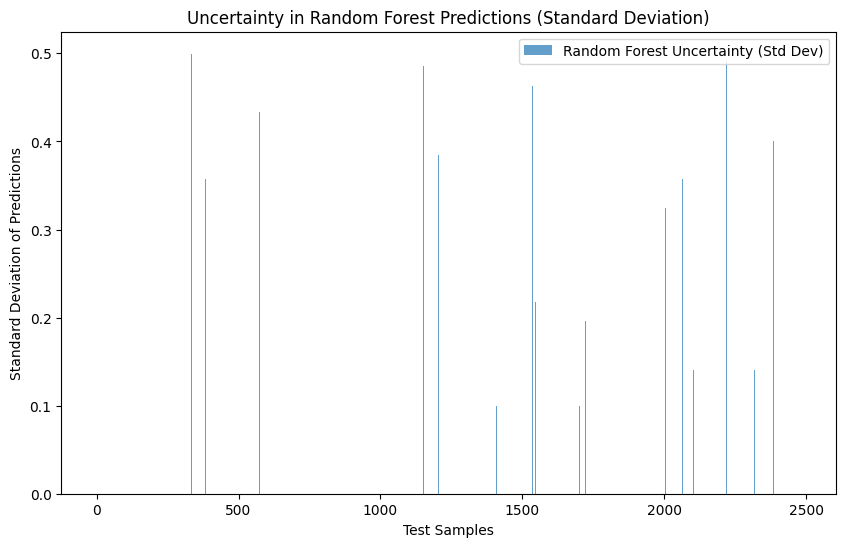

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model
rf_model.fit(X_train, y_train)

# Perform bootstrapping for uncertainty analysis
n_bootstraps = 100
bootstrap_preds = np.zeros((n_bootstraps, X_test.shape[0]))

# Perform bootstrapping
for i in range(n_bootstraps):
    # Sample with replacement from the training data
    X_bootstrap, _, y_bootstrap, _ = train_test_split(X_train, y_train, test_size=0.3, random_state=i)

    # Re-fit the Random Forest model on the bootstrapped dataset
    rf_model.fit(X_bootstrap, y_bootstrap)

    # Get predictions for the test set
    bootstrap_preds[i] = rf_model.predict(X_test)

# Calculate the mean and standard deviation of predictions
mean_preds = np.mean(bootstrap_preds, axis=0)  # Mean predictions
std_preds = np.std(bootstrap_preds, axis=0)    # Standard deviation (uncertainty) of predictions

# Display the results for each test sample
print("Uncertainty Analysis for Test Samples (Random Forest):")
for idx, (mean, std) in enumerate(zip(mean_preds, std_preds)):
    print(f"Test Sample {idx + 1}: Mean Prediction = {mean:.4f}, Std Dev = {std:.4f}")

# Calculate the overall average of mean predictions and standard deviations
average_mean_prediction = np.mean(mean_preds)
average_std_deviation = np.mean(std_preds)

# Display the overall averages
print(f"Average Mean Prediction: {average_mean_prediction:.4f}")
print(f"Average Standard Deviation: {average_std_deviation:.4f}")

# Visualize the uncertainty (standard deviation) as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(std_preds)), std_preds, alpha=0.7, label="Random Forest Uncertainty (Std Dev)")
plt.title("Uncertainty in Random Forest Predictions (Standard Deviation)")
plt.ylabel("Standard Deviation of Predictions")
plt.xlabel("Test Samples")
plt.legend()
plt.show()

Average Mean Prediction: 0.4982
Average Standard Deviation: 0.0100


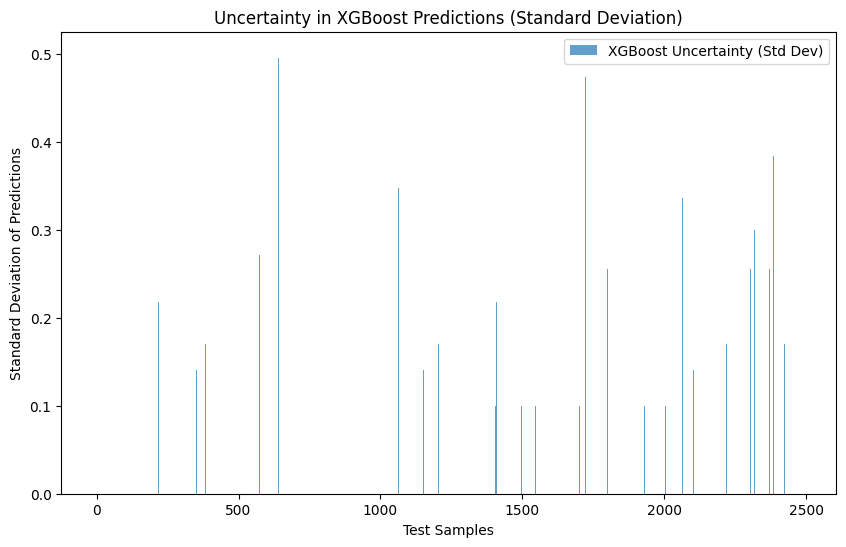

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Perform bootstrapping for uncertainty analysis
n_bootstraps = 100
bootstrap_preds = np.zeros((n_bootstraps, X_test.shape[0]))

# Perform bootstrapping
for i in range(n_bootstraps):
    # Sample with replacement from the training data
    X_bootstrap, _, y_bootstrap, _ = train_test_split(X_train, y_train, test_size=0.3, random_state=i)

    # Re-fit the XGBoost model on the bootstrapped dataset
    xgb_model.fit(X_bootstrap, y_bootstrap)

    # Get predictions for the test set
    bootstrap_preds[i] = xgb_model.predict(X_test)

# Calculate the mean and standard deviation of predictions
mean_preds = np.mean(bootstrap_preds, axis=0)  # Mean predictions
std_preds = np.std(bootstrap_preds, axis=0)    # Standard deviation (uncertainty) of predictions

# Calculate the overall average of mean predictions and standard deviations
average_mean_prediction = np.mean(mean_preds)
average_std_deviation = np.mean(std_preds)

# Display the overall averages
print(f"Average Mean Prediction: {average_mean_prediction:.4f}")
print(f"Average Standard Deviation: {average_std_deviation:.4f}")

# Visualize the uncertainty (standard deviation) as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(std_preds)), std_preds, alpha=0.7, label="XGBoost Uncertainty (Std Dev)")
plt.title("Uncertainty in XGBoost Predictions (Standard Deviation)")
plt.ylabel("Standard Deviation of Predictions")
plt.xlabel("Test Samples")
plt.legend()
plt.show()

In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow keras

In [ ]:
pip install tensorflow keras

In [ ]:
pip install --upgrade tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)  # Ensure it's 2.x or above

2.18.0


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier  # Correct import

# Define the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
best_nn = create_model()

# Train the model
nn_model = best_nn.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Perform bootstrapping for uncertainty analysis
n_bootstraps = 100
bootstrap_preds = np.zeros((n_bootstraps, X_test.shape[0]))

for i in range(n_bootstraps):
    # Sample with replacement from the training data
    X_bootstrap, _, y_bootstrap, _ = train_test_split(X_train, y_train, test_size=0.3, random_state=i)

    # Fit the neural network on the bootstrapped dataset
    nn_model.fit(X_bootstrap, y_bootstrap)

    # Get predictions for the test set
    bootstrap_preds[i] = nn_model.predict(X_test).flatten()

# Calculate the mean and standard deviation of predictions
mean_preds = np.mean(bootstrap_preds, axis=0)  # Mean predictions
std_preds = np.std(bootstrap_preds, axis=0)    # Standard deviation (uncertainty) of predictions

# Calculate the overall average of mean predictions and standard deviations
average_mean_prediction = np.mean(mean_preds)
average_std_deviation = np.mean(std_preds)

# Display the overall averages
print(f"Average Mean Prediction: {average_mean_prediction:.4f}")
print(f"Average Standard Deviation: {average_std_deviation:.4f}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5794 - loss: 12160.6758
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5991 - loss: 12668.9531
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6536 - loss: 17174.7129
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6310 - loss: 28953.6113
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6768 - loss: 21580.2031
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6871 - loss: 15451.2412
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7118 - loss: 12377.2812
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6703 - loss: 162569.5781
Epoch 9/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6944 - loss: 55344.5156
Epoch 10/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - loss: 180227.8438


AttributeError: 'History' object has no attribute 'fit'

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Define the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the model
best_nn = create_model()
best_nn.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Perform bootstrapping for uncertainty analysis
n_bootstraps = 100
bootstrap_preds = np.zeros((n_bootstraps, X_test.shape[0]))

for i in range(n_bootstraps):
    # Sample with replacement from the training data
    X_bootstrap, _, y_bootstrap, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=i)

    # Reinitialize and fit the neural network on the bootstrapped dataset
    bootstrap_nn = create_model()  # Create a fresh model for each bootstrap
    bootstrap_nn.fit(X_bootstrap, y_bootstrap, epochs=10, batch_size=64, verbose=0)

    # Get predictions for the test set
    bootstrap_preds[i] = bootstrap_nn.predict(X_test).flatten()

# Calculate the mean and standard deviation of predictions
mean_preds = np.mean(bootstrap_preds, axis=0)  # Mean predictions
std_preds = np.std(bootstrap_preds, axis=0)    # Standard deviation (uncertainty) of predictions

# Calculate the overall average of mean predictions and standard deviations
average_mean_prediction = np.mean(mean_preds)
average_std_deviation = np.mean(std_preds)

# Display the overall averages
print(f"Average Mean Prediction: {average_mean_prediction:.4f}")
print(f"Average Standard Deviation: {average_std_deviation:.4f}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6159 - loss: 58542.0078
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6233 - loss: 54358.3867
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6390 - loss: 14302.6699
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - loss: 10396.0127
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6567 - loss: 6702.4116
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6621 - loss: 27728.2969
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7203 - loss: 1212.2477
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6514 - loss: 13782.7412
Epoch 9/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6610 - loss: 46826.4180
Epoch 10/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7055 - loss: 25522.6055


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average Mean Prediction: 0.3121
Average Standard Deviation: 0.2378


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Define Random Forest and XGBoost models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the Neural Network model
def create_nn_model():
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model()

# Train Neural Network on the training set
nn_model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)

# Generate predictions from the neural network to use in stacking
nn_preds_train = nn_model.predict(X_train).flatten()
nn_preds_test = nn_model.predict(X_test).flatten()

# Add NN predictions as a feature to X_train and X_test
X_train_stack = np.hstack([X_train, nn_preds_train.reshape(-1, 1)])
X_test_stack = np.hstack([X_test, nn_preds_test.reshape(-1, 1)])

# Combine RF and XGB predictions as additional features
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

rf_preds_train = rf_model.predict_proba(X_train)[:, 1]
rf_preds_test = rf_model.predict_proba(X_test)[:, 1]
xgb_preds_train = xgb_model.predict_proba(X_train)[:, 1]
xgb_preds_test = xgb_model.predict_proba(X_test)[:, 1]

# Create the final stacking dataset
X_train_final = np.hstack([X_train_stack, rf_preds_train.reshape(-1, 1), xgb_preds_train.reshape(-1, 1)])
X_test_final = np.hstack([X_test_stack, rf_preds_test.reshape(-1, 1), xgb_preds_test.reshape(-1, 1)])

# Meta-model (ElasticNet)
meta_model = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)
meta_model.fit(X_train_final, y_train)

# Predict using the stacking model
stacking_preds = meta_model.predict(X_test_final)
stacking_preds_binary = (stacking_preds > 0.5).astype(int)

# Evaluate accuracy of the stacking model
accuracy = accuracy_score(y_test, stacking_preds_binary)
print(f"Stacking Model Accuracy: {accuracy:.4f}")

# Perform bootstrapping for uncertainty analysis
n_bootstraps = 100
bootstrap_preds = np.zeros((n_bootstraps, X_test.shape[0]))

for i in range(n_bootstraps):
    # Sample with replacement from the training data
    X_bootstrap, _, y_bootstrap, _ = train_test_split(X_train_final, y_train, test_size=0.3, random_state=i)

    # Fit the meta-model on the bootstrapped dataset
    meta_model.fit(X_bootstrap, y_bootstrap)

    # Get predictions for the test set
    bootstrap_preds[i] = meta_model.predict(X_test_final)

# Calculate the mean and standard deviation of predictions
mean_preds = np.mean(bootstrap_preds, axis=0)  # Mean predictions
std_preds = np.std(bootstrap_preds, axis=0)    # Standard deviation (uncertainty) of predictions

# Calculate the overall average of mean predictions and standard deviations
average_mean_prediction = np.mean(mean_preds)
average_std_deviation = np.mean(std_preds)

# Display the results
print(f"Average Mean Prediction: {average_mean_prediction:.4f}")
print(f"Average Standard Deviation: {average_std_deviation:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:19:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Model Accuracy: 0.6851
Average Mean Prediction: 0.5113
Average Standard Deviation: 0.0057


## **17 columns**

Uncertainty Analysis for Test Samples (Random Forest):
Test Sample 1: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 2: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 3: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 4: Mean Prediction = 0.0000, Std Dev = 0.0000
Test Sample 5: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 6: Mean Prediction = 0.0000, Std Dev = 0.0000
Test Sample 7: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 8: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 9: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 10: Mean Prediction = 0.0000, Std Dev = 0.0000
Test Sample 11: Mean Prediction = 0.0000, Std Dev = 0.0000
Test Sample 12: Mean Prediction = 0.0000, Std Dev = 0.0000
Test Sample 13: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sample 14: Mean Prediction = 0.0000, Std Dev = 0.0000
Test Sample 15: Mean Prediction = 0.0000, Std Dev = 0.0000
Test Sample 16: Mean Prediction = 1.0000, Std Dev = 0.0000
Test Sampl

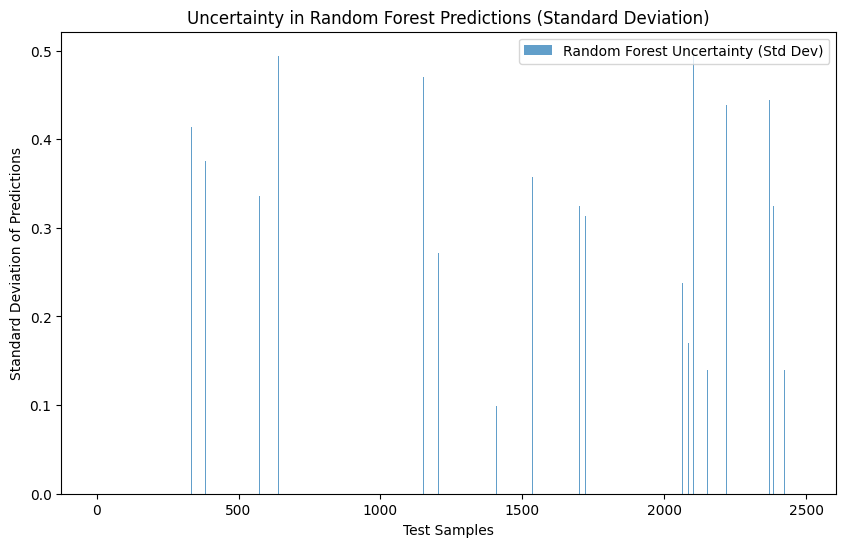

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model
rf_model.fit(X_train, y_train)

# Perform bootstrapping for uncertainty analysis
n_bootstraps = 100
bootstrap_preds = np.zeros((n_bootstraps, X_test.shape[0]))

# Perform bootstrapping
for i in range(n_bootstraps):
    # Sample with replacement from the training data
    X_bootstrap, _, y_bootstrap, _ = train_test_split(X_train, y_train, test_size=0.3, random_state=i)

    # Re-fit the Random Forest model on the bootstrapped dataset
    rf_model.fit(X_bootstrap, y_bootstrap)

    # Get predictions for the test set
    bootstrap_preds[i] = rf_model.predict(X_test)

# Calculate the mean and standard deviation of predictions
mean_preds = np.mean(bootstrap_preds, axis=0)  # Mean predictions
std_preds = np.std(bootstrap_preds, axis=0)    # Standard deviation (uncertainty) of predictions

# Display the results for each test sample
print("Uncertainty Analysis for Test Samples (Random Forest):")
for idx, (mean, std) in enumerate(zip(mean_preds, std_preds)):
    print(f"Test Sample {idx + 1}: Mean Prediction = {mean:.4f}, Std Dev = {std:.4f}")

# Calculate the overall average of mean predictions and standard deviations
average_mean_prediction = np.mean(mean_preds)
average_std_deviation = np.mean(std_preds)

# Display the overall averages
print(f"Average Mean Prediction: {average_mean_prediction:.4f}")
print(f"Average Standard Deviation: {average_std_deviation:.4f}")

# Visualize the uncertainty (standard deviation) as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(std_preds)), std_preds, alpha=0.7, label="Random Forest Uncertainty (Std Dev)")
plt.title("Uncertainty in Random Forest Predictions (Standard Deviation)")
plt.ylabel("Standard Deviation of Predictions")
plt.xlabel("Test Samples")
plt.legend()
plt.show()

Average Mean Prediction: 0.4979
Average Standard Deviation: 0.0086


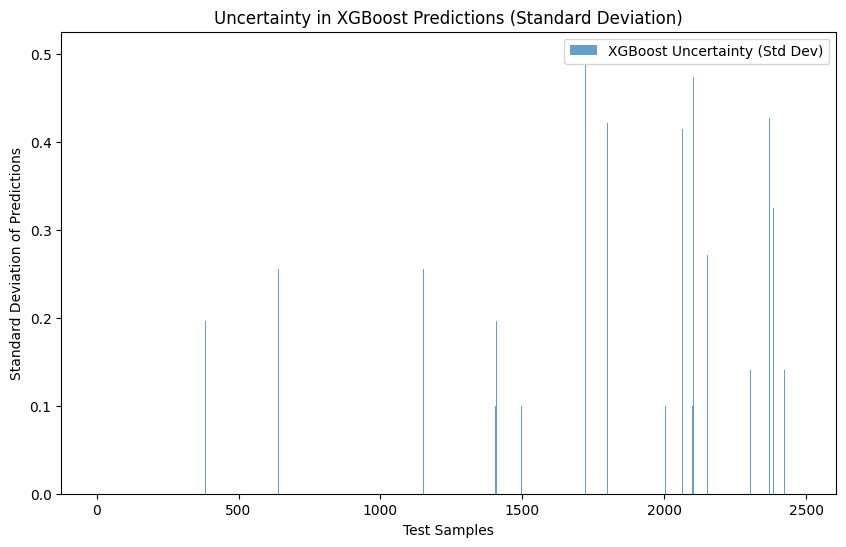

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Perform bootstrapping for uncertainty analysis
n_bootstraps = 100
bootstrap_preds = np.zeros((n_bootstraps, X_test.shape[0]))

# Perform bootstrapping
for i in range(n_bootstraps):
    # Sample with replacement from the training data
    X_bootstrap, _, y_bootstrap, _ = train_test_split(X_train, y_train, test_size=0.3, random_state=i)

    # Re-fit the XGBoost model on the bootstrapped dataset
    xgb_model.fit(X_bootstrap, y_bootstrap)

    # Get predictions for the test set
    bootstrap_preds[i] = xgb_model.predict(X_test)

# Calculate the mean and standard deviation of predictions
mean_preds = np.mean(bootstrap_preds, axis=0)  # Mean predictions
std_preds = np.std(bootstrap_preds, axis=0)    # Standard deviation (uncertainty) of predictions

# Calculate the overall average of mean predictions and standard deviations
average_mean_prediction = np.mean(mean_preds)
average_std_deviation = np.mean(std_preds)

# Display the overall averages
print(f"Average Mean Prediction: {average_mean_prediction:.4f}")
print(f"Average Standard Deviation: {average_std_deviation:.4f}")

# Visualize the uncertainty (standard deviation) as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(std_preds)), std_preds, alpha=0.7, label="XGBoost Uncertainty (Std Dev)")
plt.title("Uncertainty in XGBoost Predictions (Standard Deviation)")
plt.ylabel("Standard Deviation of Predictions")
plt.xlabel("Test Samples")
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Define the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the model
best_nn = create_model()
best_nn.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Perform bootstrapping for uncertainty analysis
n_bootstraps = 100
bootstrap_preds = np.zeros((n_bootstraps, X_test.shape[0]))

for i in range(n_bootstraps):
    # Sample with replacement from the training data
    X_bootstrap, _, y_bootstrap, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=i)

    # Reinitialize and fit the neural network on the bootstrapped dataset
    bootstrap_nn = create_model()  # Create a fresh model for each bootstrap
    bootstrap_nn.fit(X_bootstrap, y_bootstrap, epochs=10, batch_size=64, verbose=0)

    # Get predictions for the test set
    bootstrap_preds[i] = bootstrap_nn.predict(X_test).flatten()

# Calculate the mean and standard deviation of predictions
mean_preds = np.mean(bootstrap_preds, axis=0)  # Mean predictions
std_preds = np.std(bootstrap_preds, axis=0)    # Standard deviation (uncertainty) of predictions

# Calculate the overall average of mean predictions and standard deviations
average_mean_prediction = np.mean(mean_preds)
average_std_deviation = np.mean(std_preds)

# Display the overall averages
print(f"Average Mean Prediction: {average_mean_prediction:.4f}")
print(f"Average Standard Deviation: {average_std_deviation:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6210 - loss: 55560.6367
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6119 - loss: 3111501.0000
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - loss: 25983.7734
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6822 - loss: 1212944.8750
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7141 - loss: 45052.9297
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6892 - loss: 69152.5312
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7119 - loss: 562996.0625
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6622 - loss: 61502.6445
Epoch 9/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7238 - loss: 51381.1797
Epoch 10/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6462 - loss: 119505.3359


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average Mean Prediction: 0.3523
Average Standard Deviation: 0.2632


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Define Random Forest and XGBoost models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the Neural Network model
def create_nn_model():
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model()

# Train Neural Network on the training set
nn_model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)

# Generate predictions from the neural network to use in stacking
nn_preds_train = nn_model.predict(X_train).flatten()
nn_preds_test = nn_model.predict(X_test).flatten()

# Add NN predictions as a feature to X_train and X_test
X_train_stack = np.hstack([X_train, nn_preds_train.reshape(-1, 1)])
X_test_stack = np.hstack([X_test, nn_preds_test.reshape(-1, 1)])

# Combine RF and XGB predictions as additional features
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

rf_preds_train = rf_model.predict_proba(X_train)[:, 1]
rf_preds_test = rf_model.predict_proba(X_test)[:, 1]
xgb_preds_train = xgb_model.predict_proba(X_train)[:, 1]
xgb_preds_test = xgb_model.predict_proba(X_test)[:, 1]

# Create the final stacking dataset
X_train_final = np.hstack([X_train_stack, rf_preds_train.reshape(-1, 1), xgb_preds_train.reshape(-1, 1)])
X_test_final = np.hstack([X_test_stack, rf_preds_test.reshape(-1, 1), xgb_preds_test.reshape(-1, 1)])

# Meta-model (ElasticNet)
meta_model = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)
meta_model.fit(X_train_final, y_train)

# Predict using the stacking model
stacking_preds = meta_model.predict(X_test_final)
stacking_preds_binary = (stacking_preds > 0.5).astype(int)

# Evaluate accuracy of the stacking model
accuracy = accuracy_score(y_test, stacking_preds_binary)
print(f"Stacking Model Accuracy: {accuracy:.4f}")

# Perform bootstrapping for uncertainty analysis
n_bootstraps = 100
bootstrap_preds = np.zeros((n_bootstraps, X_test.shape[0]))

for i in range(n_bootstraps):
    # Sample with replacement from the training data
    X_bootstrap, _, y_bootstrap, _ = train_test_split(X_train_final, y_train, test_size=0.3, random_state=i)

    # Fit the meta-model on the bootstrapped dataset
    meta_model.fit(X_bootstrap, y_bootstrap)

    # Get predictions for the test set
    bootstrap_preds[i] = meta_model.predict(X_test_final)

# Calculate the mean and standard deviation of predictions
mean_preds = np.mean(bootstrap_preds, axis=0)  # Mean predictions
std_preds = np.std(bootstrap_preds, axis=0)    # Standard deviation (uncertainty) of predictions

# Calculate the overall average of mean predictions and standard deviations
average_mean_prediction = np.mean(mean_preds)
average_std_deviation = np.mean(std_preds)

# Display the results
print(f"Average Mean Prediction: {average_mean_prediction:.4f}")
print(f"Average Standard Deviation: {average_std_deviation:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:03:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Model Accuracy: 0.7128
Average Mean Prediction: 0.5073
Average Standard Deviation: 0.0168
